In [1]:
from GD_linear import *

In [2]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=1, n_targets=1, bias=50, noise=30, random_state=0)
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [3]:
model = sm.OLS(y, X)
result = model.fit()
result.params

array([ 50.77632751,  82.01323352])

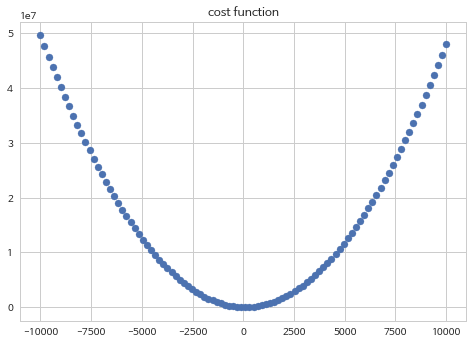

In [4]:
pltcost_w(X, y)

In [5]:
W0 = np.array([5, 5])

## Batch Gradient Descent
---
$$W = [w_0, w_1, \cdots , w_k], k\ 는\ feature\ 갯수 $$

$$\hat{y_i} = \sum_{j}^{k}{x_{ij} \cdot w_j} = X_i \cdot W\ ,\ i\ sample\ 에\ 대해서$$

$$ Cost(W) = \frac{\sum_{i}^{m}{(\hat{y_i} - y_i )^2}}{2\times m} = \frac{\sum_{i}^{m}{(X_i \cdot W - y_i )^2}}{2\times m} $$ 

m은 여기서 데이터 샘플 수 (X혹은 y 의 길이)

$$gradient = \frac{\partial{Cost(W)}}{\partial{W}} = \frac{\sum_{i}^{m}{X_{i}^{T}(X_i \cdot W - y_i})}{m}$$

In [6]:
W, history_, frame = batch_gradient_descent(X, y, W0, n=1000, alpha=0.1, epsilon=1e-6)

112


In [7]:
W

array([ 50.77560053,  82.0122145 ])

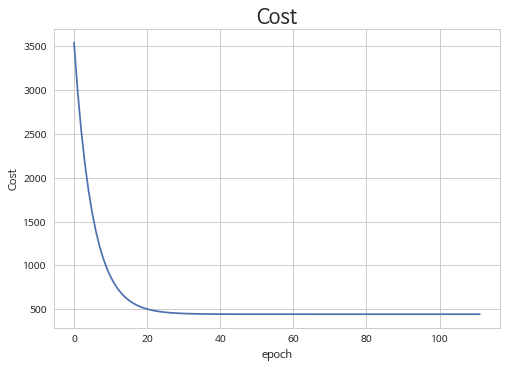

In [8]:
pltcost(history_)

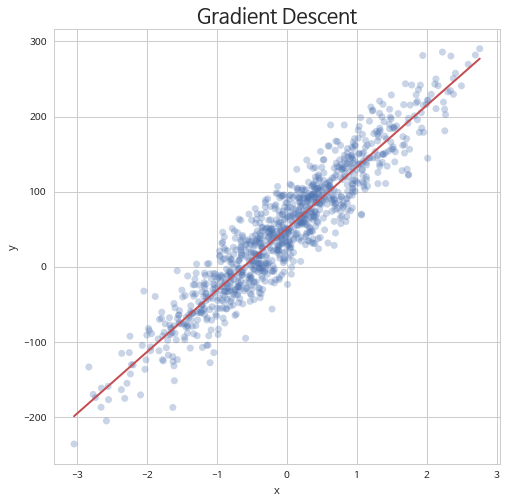

In [9]:
doani = AniPlot('Gradient Descent', frame, 50)
doani.set_data(X, y, history_)
anim = doani.animate()
anim

## SGD
---

In [9]:
W, history_, frame = sgd(X, y, W0, n=1000, alpha=0.1, batch_size=10, epsilon=1e-6)

383


In [10]:
W

array([  39.15392907,  107.9474707 ])

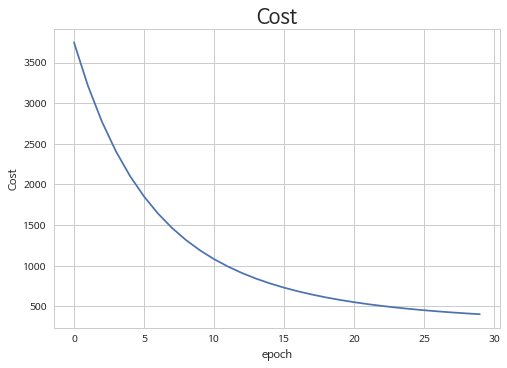

In [11]:
pltcost(history_)

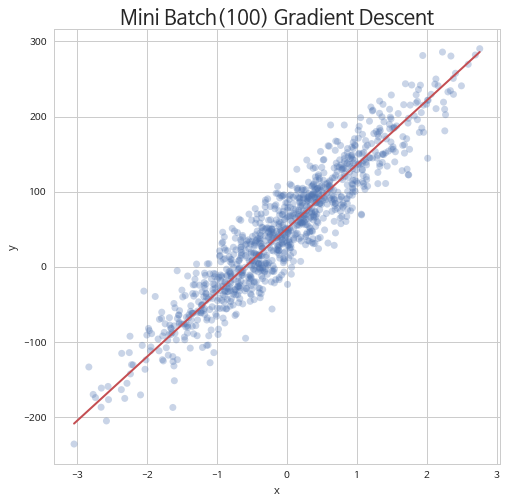

In [27]:
doani = AniPlot('Mini Batch(100) Gradient Descent', frame, 50)
doani.set_data(X, y, history_)
anim = doani.animate()
anim

In [12]:
W, history_, frame = sgd(X, y, W0, n=1000, alpha=0.1, batch_size=1, epsilon=1e-6)

136


In [13]:
W

array([-0.86805437,  6.77361785])

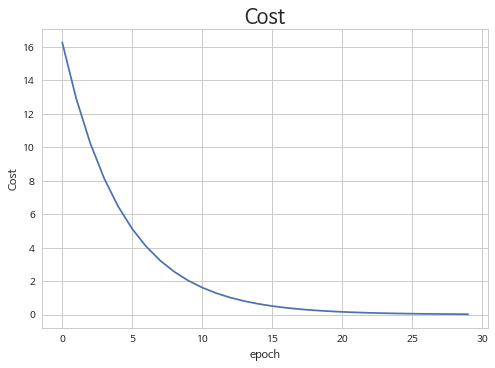

In [14]:
pltcost(history_)

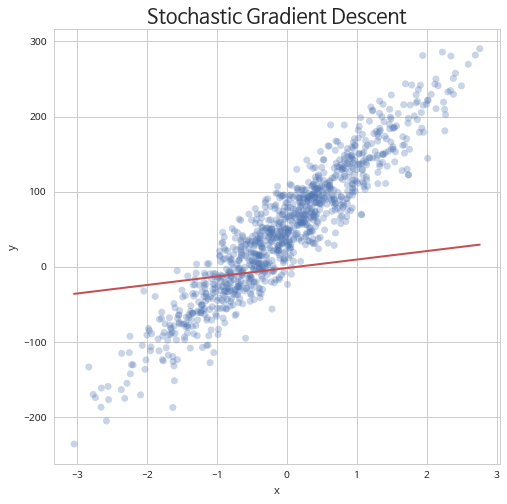

In [36]:
doani = AniPlot('Stochastic Gradient Descent', frame, 50)
doani.set_data(X, y, history_)
anim = doani.animate()
anim

## Momentum
---
$$v_t = \gamma v_{t-1} + \eta \nabla_{\theta}J(\theta)$$

$$\theta = \theta - v_t$$

In [15]:
W, history_, frame = momentum(X, y, W0, alpha=0.1, gamma=0.9, epsilon=1e-6, batch_size=100)

209


In [16]:
W

array([ 53.49996199,  83.58305399])

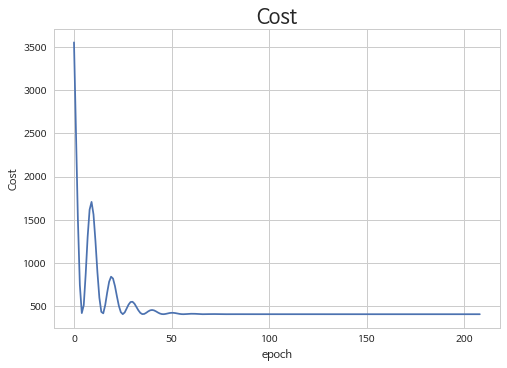

In [17]:
pltcost(history_)

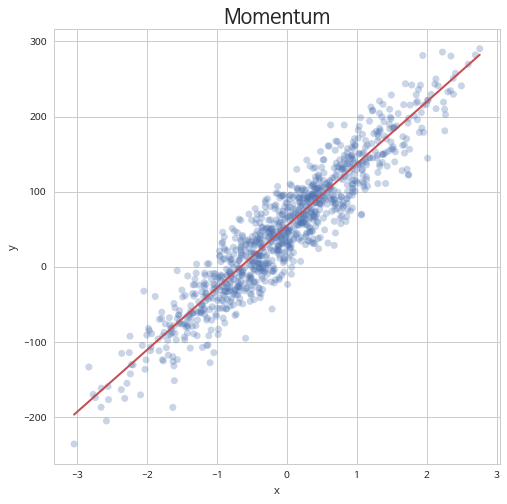

In [25]:
doani = AniPlot('Momentum', frame, 50)
doani.set_data(X, y, history_)
anim = doani.animate()
anim

## Nesterov Accelerated Gradient (NAG)
---
$$v_t = \gamma v_{t-1}+ \eta\nabla_{\theta}J(\theta-\gamma v_{t-1})$$

$$\theta = \theta - v_t$$

In [18]:
W, history_, frame = NAG(X, y, W0, alpha=0.1, gamma=0.9, epsilon=1e-6, batch_size=100)

117


In [19]:
W

array([ 50.94942216,  87.81346699])

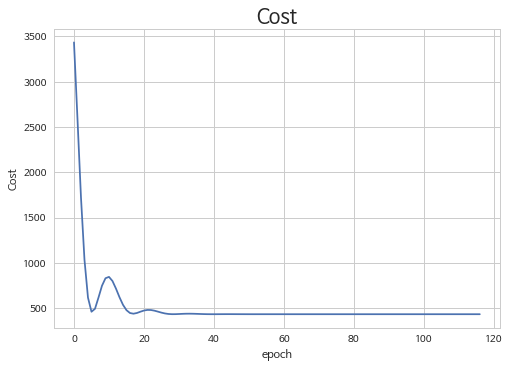

In [20]:
pltcost(history_)

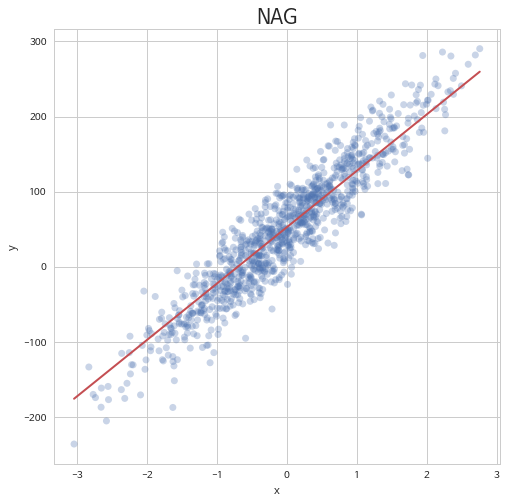

In [28]:
doani = AniPlot('NAG', frame, 50)
doani.set_data(X, y, history_)
anim = doani.animate()
anim

## Adagrad
---
$$G_{t} = G_{t-1} + (\nabla_{\theta}J(\theta_t))^2$$

$$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \cdot \nabla_{\theta}J(\theta_t)$$

In [15]:
W0 = np.array([5, 5])

In [6]:
W, history_, frame = Adagrad(X, y, W0, n=1000, alpha=0.1, epsilon=1e-6, batch_size=100)

In [7]:
W

array([ 40.85233884,  44.84235691])

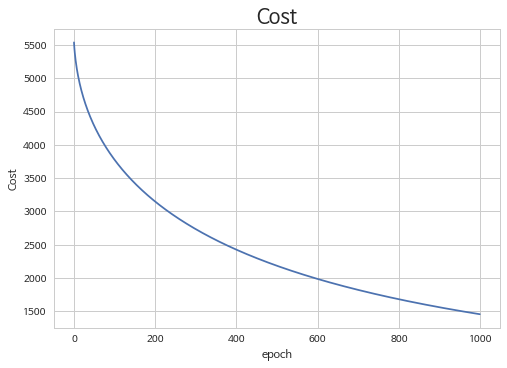

In [8]:
pltcost(history_)

## RMSProp
---
$$MS(G_{t}) = \gamma MS(G_{t-1}) + (1-\gamma)(\nabla_{\theta}J(\theta_t))^2$$

$$\theta = \theta - \frac{\eta}{\sqrt{MS(G_{t}) + \epsilon}} \cdot \nabla_{\theta}J(\theta_t)$$

In [9]:
W, history_, frame = RMSProp(X, y, W0, alpha=0.1, gamma=0.9, epsilon=1e-6, batch_size=100)

In [10]:
W

array([  9.79934308,  13.13732654])

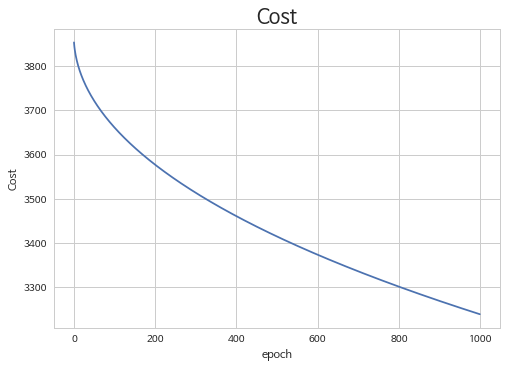

In [11]:
pltcost(history_)

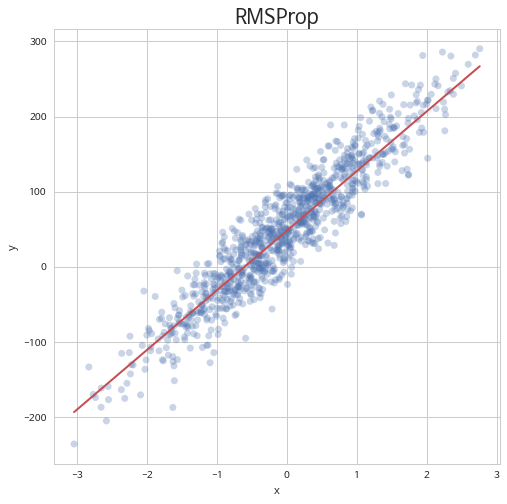

In [25]:
doani = AniPlot('RMSProp', frame, 15)
doani.set_data(X, y, history_)
anim = doani.animate()
anim

## AdaDelta
---
$$MS(G_{t}) = \gamma MS(G_{t-1}) + (1-\gamma)(\nabla_{\theta}J(\theta_t))^2$$

$$\Delta_{\theta} =  \frac{\sqrt{s+\epsilon}}{\sqrt{MS(G_{t}) + \epsilon}} \cdot \nabla_{\theta}J(\theta_t)$$

$$\theta = \theta - \Delta_{\theta}$$

$$s = \gamma s + (1-\gamma) \Delta_{\theta}^2$$

In [18]:
W, history_, frame = AdaDelta(X, y, W0, gamma=0.9, epsilon=1e-8, batch_size=100)

In [19]:
W

array([ 41.77873668,  72.78103219])

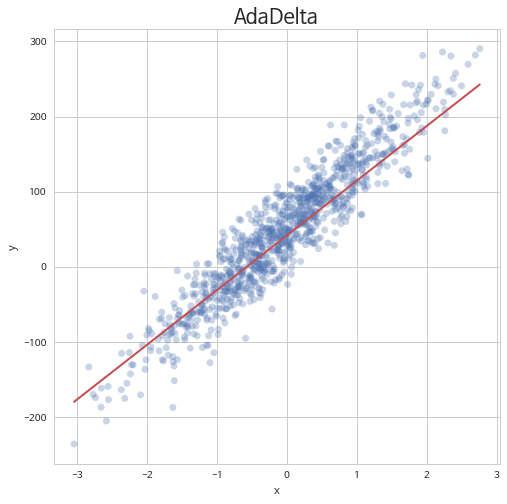

In [20]:
doani = AniPlot('AdaDelta', frame, 15)
doani.set_data(X, y, history_)
anim = doani.animate()
anim

## Adam
---
$$m_t = \beta_1 m_{t-1} + (1-\beta_1)\nabla_\theta J(\theta)$$

$$v_t = \beta_2 v_{t-1} + (1-\beta_2)(\nabla_\theta J(\theta))^2$$

$$\hat{m_t} = \frac{m_t}{1-\beta_1^t}$$

$$\hat{v_t} = \frac{v_t}{1-\beta_2^t}$$

$$\theta = \theta - \frac{\eta}{\sqrt{\hat{v_t}+\epsilon}}\hat{m_t}$$

In [78]:
W, history_, frame = Adam(X, y, W0, alpha=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, batch_size=100)

In [79]:
W

array([ 51.82981342,  82.22337065])

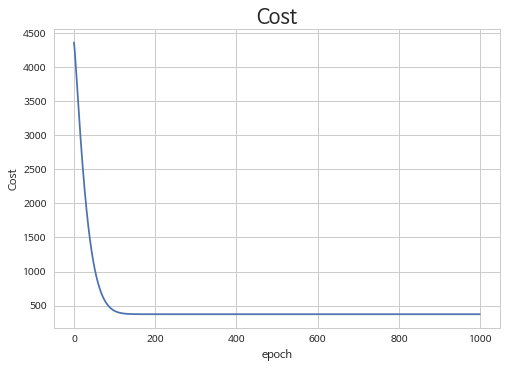

In [80]:
pltcost(history_)

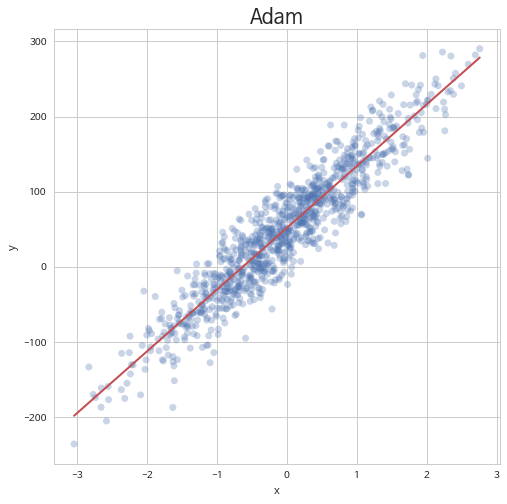

In [81]:
doani = AniPlot('Adam', frame, 15)
doani.set_data(X, y, history_)
anim = doani.animate()
anim